### Edgar Moises Hernandez-Gonzalez
#### 04/12/19-06/04/20
#### Clasificacion de RWE-DWT de MI-EEG con LSTM + CNN
##### 5 ejecuciones independientes para obtener la media y desviacion estandar

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [ ]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [ ]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [ ]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [ ]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


Iteration: 1
9/9 [==============================] - 0s 2ms/step - loss: 1.2183 - accuracy: 0.5069
kappa:  0.34259259259259256
confusion matrix:
 [[37 25  6  4]
 [16 50  5  1]
 [23  0 22 27]
 [16  2 17 37]]
(0.5069391116130246, 0.5069444444444444, 0.5019597211332041, None)


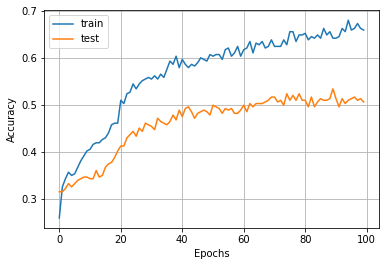

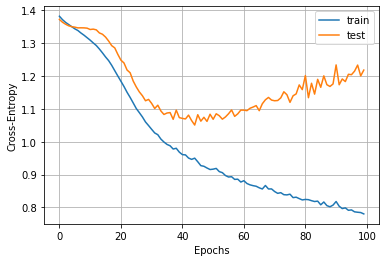

Iteration: 2
9/9 [==============================] - 0s 2ms/step - loss: 1.2310 - accuracy: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[37 26  6  3]
 [20 47  4  1]
 [22  1 23 26]
 [19  2 17 34]]
(0.4968055182599356, 0.48958333333333326, 0.4868696082775157, None)


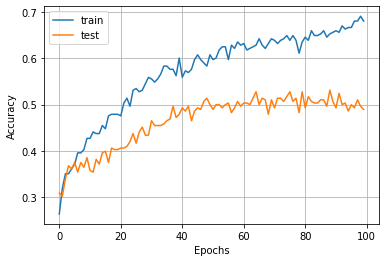

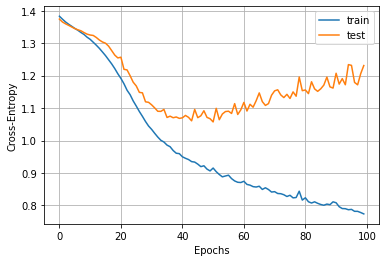

Iteration: 3
9/9 [==============================] - 0s 2ms/step - loss: 1.2124 - accuracy: 0.5000
kappa:  0.33333333333333337
confusion matrix:
 [[36 26  7  3]
 [21 47  3  1]
 [21  1 27 23]
 [17  3 18 34]]
(0.5094057797250204, 0.5, 0.4996213134136993, None)


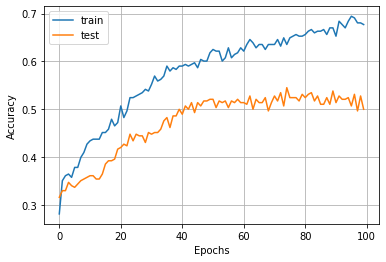

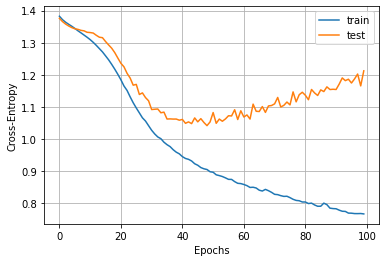

Iteration: 4
9/9 [==============================] - 0s 2ms/step - loss: 1.2368 - accuracy: 0.4826
kappa:  0.31018518518518523
confusion matrix:
 [[40 23  6  3]
 [24 43  4  1]
 [23  0 22 27]
 [20  0 18 34]]
(0.49710596257325224, 0.48263888888888884, 0.4817804706917998, None)


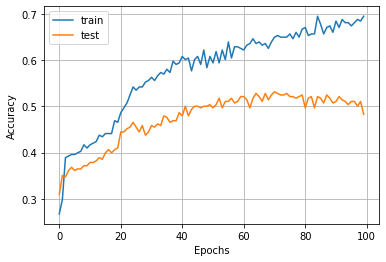

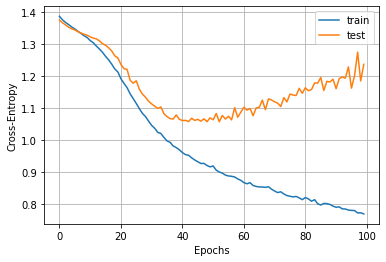

Iteration: 5
9/9 [==============================] - 0s 2ms/step - loss: 1.1714 - accuracy: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[34 27  7  4]
 [13 53  5  1]
 [20  0 27 25]
 [17  3 15 37]]
(0.5238887318998809, 0.5243055555555556, 0.5201784832325561, None)


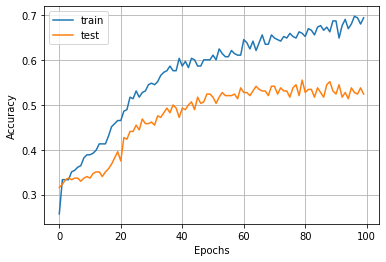

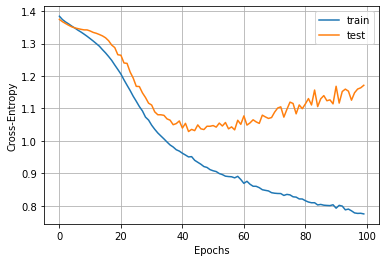


Resultados:
loss: [1.2183152437210083, 1.2310357093811035, 1.212430477142334, 1.2368448972702026, 1.1713776588439941]
accuracy: [0.5069444179534912, 0.4895833432674408, 0.5, 0.4826388955116272, 0.5243055820465088]
kappa: [0.34259259259259256, 0.3194444444444444, 0.33333333333333337, 0.31018518518518523, 0.3657407407407407]
precision: [0.5069391116130246, 0.4968055182599356, 0.5094057797250204, 0.49710596257325224, 0.5238887318998809]
recall: [0.5069444444444444, 0.48958333333333326, 0.5, 0.48263888888888884, 0.5243055555555556]
f1: [0.5019597211332041, 0.4868696082775157, 0.4996213134136993, 0.4817804706917998, 0.5201784832325561]


In [ ]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(3,22)))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    
    optimizer = Adam(lr=1e-4)
    model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 3, 256)            285696    
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
flatten_20 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 1028      
Total params: 483,588
Trainable params: 483,588
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5007
std: (+/- 0.0145)
kappa: 0.3343
std: 0.0193
precision: 0.5068
recall: 0.5007
f1: 0.4981
